In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import seaborn as sns
from sklearn.decomposition import KernelPCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rc('font', size = 11)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired'))
sns.palplot(sns.color_palette('Paired'))
sns.set()

In [2]:
#import pandas as pd
dataset_read = pd.read_excel('pilot_experiment_TPM_WTonly.xlsx') #reading the dataset using pandas read_excel function
unprocessed_dataset = dataset_read.iloc[:, 0:].T #Transpose of the raw dataset
y = dataset_read.columns.values.tolist() #getting the label/target labels as list from the dataset 

y_categorized = [] 
sample_list = []
#assigning categorical label to 0-9 (ascending order) to y_categorized as label for each sample
for i in y:
    if i[:-2] == 'Ox_Leaf1_T1':
        y_categorized.append(0)
        sample_list.append('L1T1')
    elif i[:-2] == 'Ox_Leaf1_T2':
        y_categorized.append(1)
        sample_list.append('L1T2')
    elif i[:-2] == 'Ox_Leaf1_T3':
        y_categorized.append(2)
        sample_list.append('L1T3')
    elif i[:-2] == 'Ox_Leaf1_T4':
        y_categorized.append(3)
        sample_list.append('L1T4')
    elif i[:-2] == 'Ox_Leaf3_T2':
        y_categorized.append(4)
        sample_list.append('L3T2')
    elif i[:-2] == 'Ox_Leaf3_T3':
        y_categorized.append(5)
        sample_list.append('L3T3')
    elif i[:-2] == 'Ox_Leaf3_T4':
        y_categorized.append(6)
        sample_list.append('L3T4')
    elif i[:-2] == 'Ox_Leaf5_T3':
        y_categorized.append(7)
        sample_list.append('L5T3')
    elif i[:-2] == 'Ox_Leaf5_T4':
        y_categorized.append(8)
        sample_list.append('L5T4')
    elif i[:-2] == 'Ox_Leaf7_T4':
        y_categorized.append(9)
        sample_list.append('L7T4')

unprocessed_dataset['y'] = y_categorized #putting the label information with the dataset, as the dataset does not contain the label
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values #getting the dataset without label, where each row represents sample, each column represents featues or independent variables
y = dataset.iloc[:, -1].values #label column from the data set

#for the plotting with the labels
#import numpy as np
sample_arr = np.array(sample_list)
set_sample = set(sample_list)
set_sample = sorted(list(set_sample))

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X)
print('For standard Scalar, the max value for each row is same:', np.amax(sc_X_train, axis = 1))

For standard Scalar, the max value for each row is same: [5.38516481 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481
 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481
 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481
 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481
 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481 5.38516481]


### KernalPCA : Non-linear dimensionality reduction through the use of kernels
kernel trick, a method to project original data into higher dimension without sacrificing too much computational time. (Non-linear feature mapping). The basic idea to deal with linearly inseparable data is to project it onto a higher dimensional space where it becomes linearly separable.
The “classic” PCA approach is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
kpca = KernelPCA(kernel = 'rbf')
#Using the PCA on my scaled features
X_transformed = kpca.fit_transform(sc_X_train)
#transforming my features to 2 dimension(feature extraction from my orginal feature set)

In [5]:
explained_variance = np.var(X_transformed, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
pca_components_var = np.cumsum(explained_variance_ratio)
num_components = 0
for i in pca_components_var:
    if i <= 0.9999:
        num_components = num_components + 1
    else:
        break

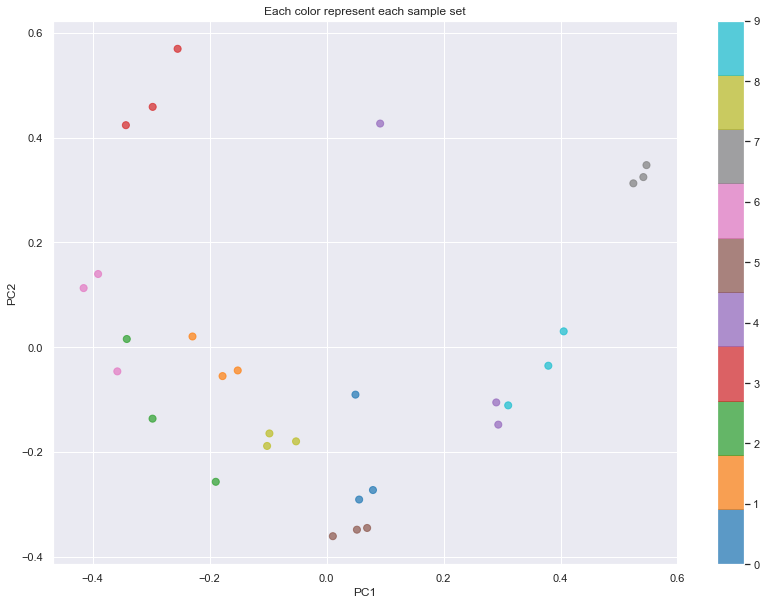

28 components from Kernal PCA retains 99.99% variance of the data.


In [6]:
plt.figure(figsize = (14,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c = y, s = 50, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.title('Each color represent each sample set')
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Normalized_Quantile_PCA-transformed.png', dpi = 200)
plt.show()
print('{} components from Kernal PCA retains 99.99% variance of the data.'.format(num_components))

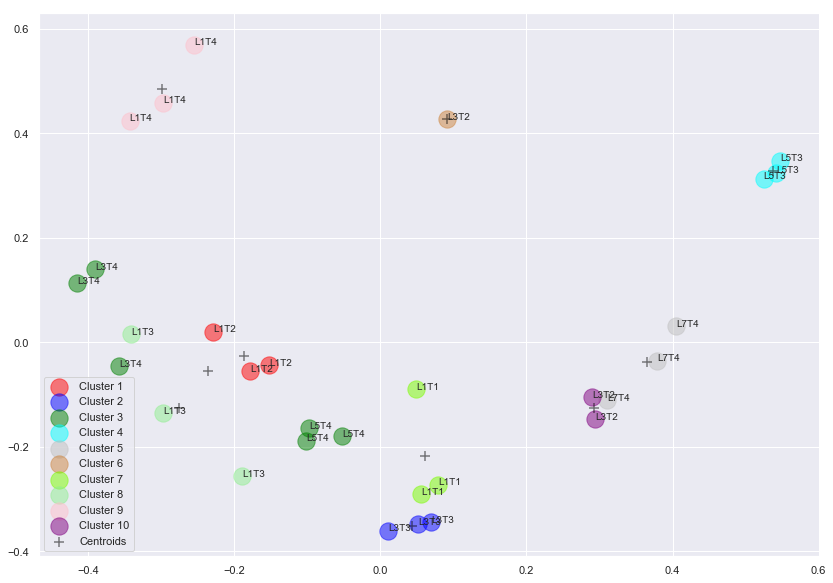

In [7]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
Kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100) #creating the Kmeans object
Kmeans.fit(X_transformed)
y_kmeans = Kmeans.fit_predict(X_transformed) #fitting the learning model to the data and predicting the clusters for the samples
plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 5, 0], X_transformed[y_kmeans == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 6, 0], X_transformed[y_kmeans == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 7, 0], X_transformed[y_kmeans == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 8, 0], X_transformed[y_kmeans == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 9, 0], X_transformed[y_kmeans == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 100, marker = '+', c = 'black', label = 'Centroids', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#fig.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Kmeans_KPCA_SC.png', dpi = 200)
plt.show()

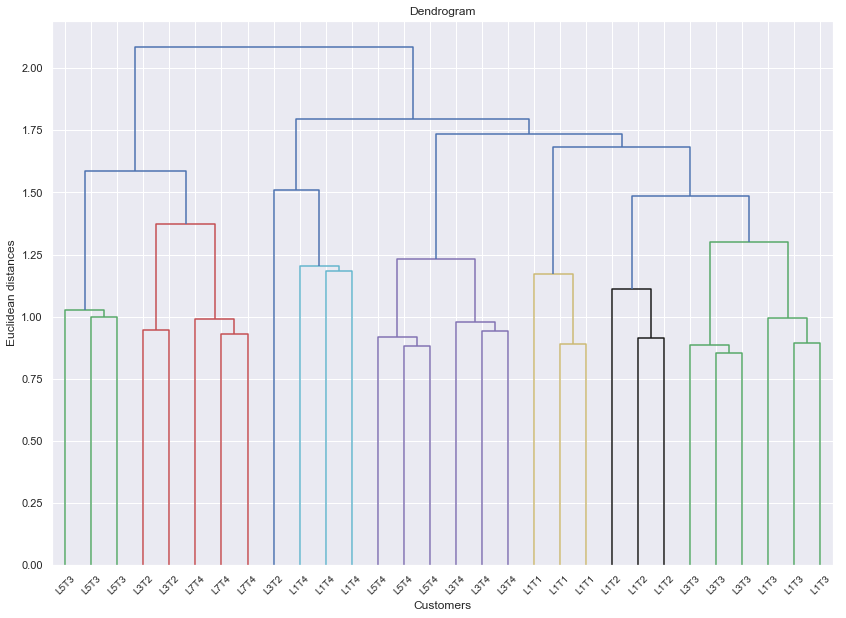

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (14,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'), labels = sample_list)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

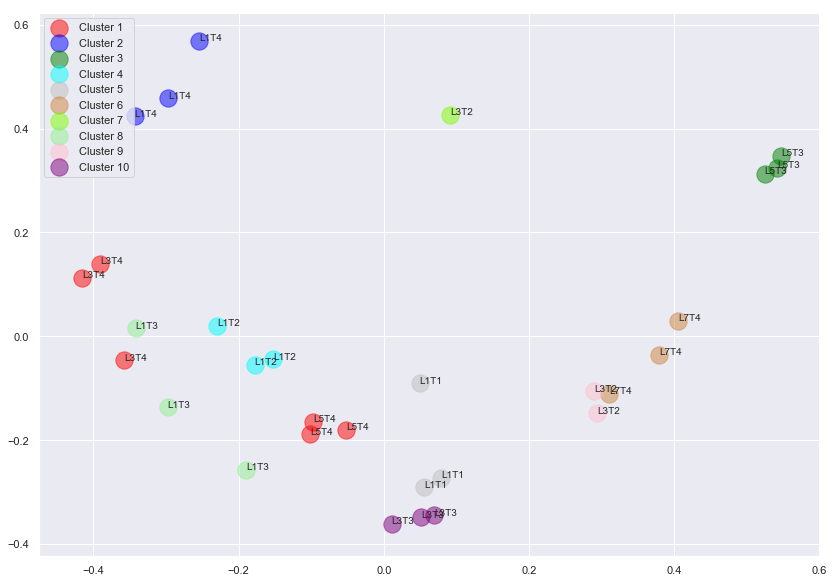

In [9]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_transformed)

plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/KMeans_Rawdata.png', dpi = 200)
plt.show()

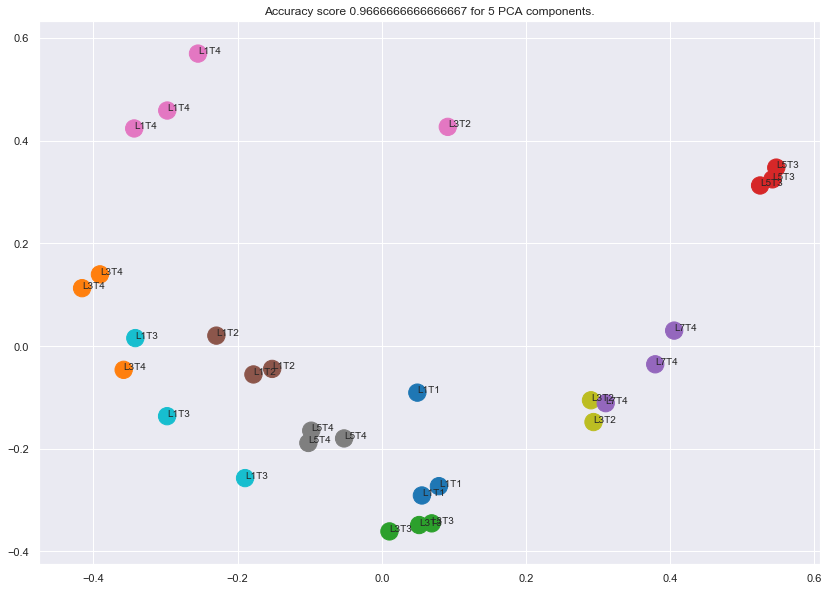

In [10]:
kpca_opt = KernelPCA(n_components = 5, kernel = 'rbf')
X_trans = kpca_opt.fit_transform(sc_X_train)

Kmeans_optimized = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100)
Kmeans_optimized.fit(X_trans)
y_kmeans_opt = Kmeans_optimized.fit_predict(X_trans)

labels = np.zeros_like(y_kmeans_opt)
for j in range(10):
    mask = (y_kmeans_opt == j)
    labels[mask] = mode(y[mask])[0]
acc_score = accuracy_score(y, labels)
plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y_kmeans_opt, s = 300, cmap='tab10')
plt.title('Accuracy score {} for {} PCA components.'.format(acc_score, 5))
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_trans[:,0][i], X_trans[:,1][i]))
#fig.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Kmeans_kPCA_optimized.png', dpi = 200)

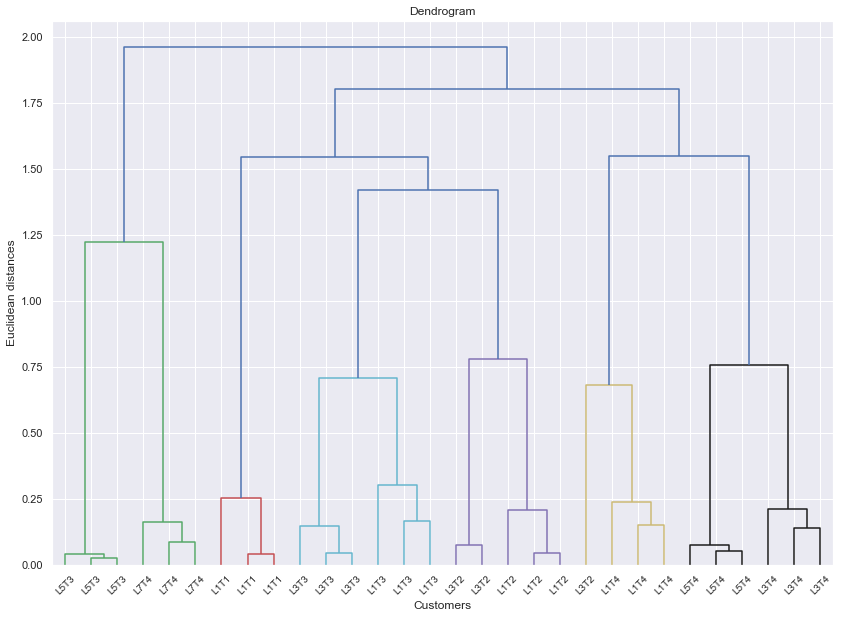

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (14,10))
dendrogram = sch.dendrogram(sch.linkage(X_trans, method = 'ward'), labels = sample_list)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

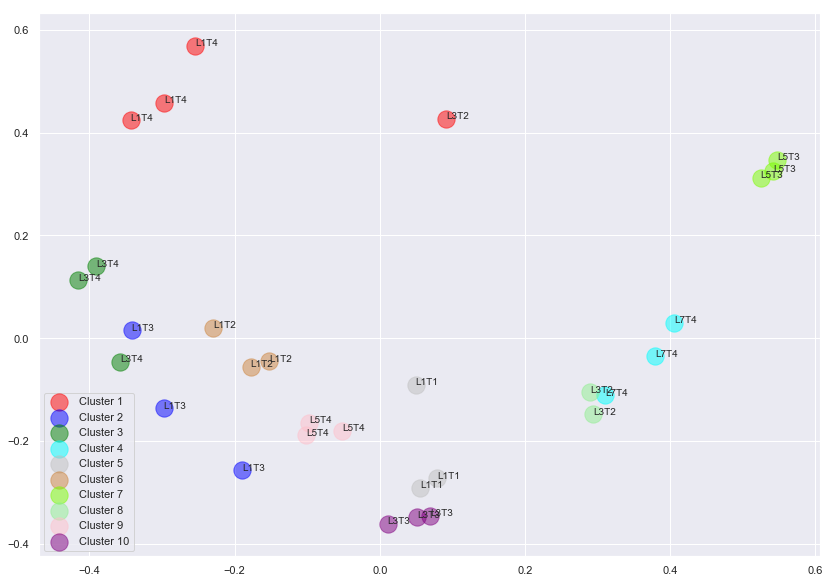

In [12]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_trans)

plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/KMeans_Rawdata.png', dpi = 200)
plt.show()

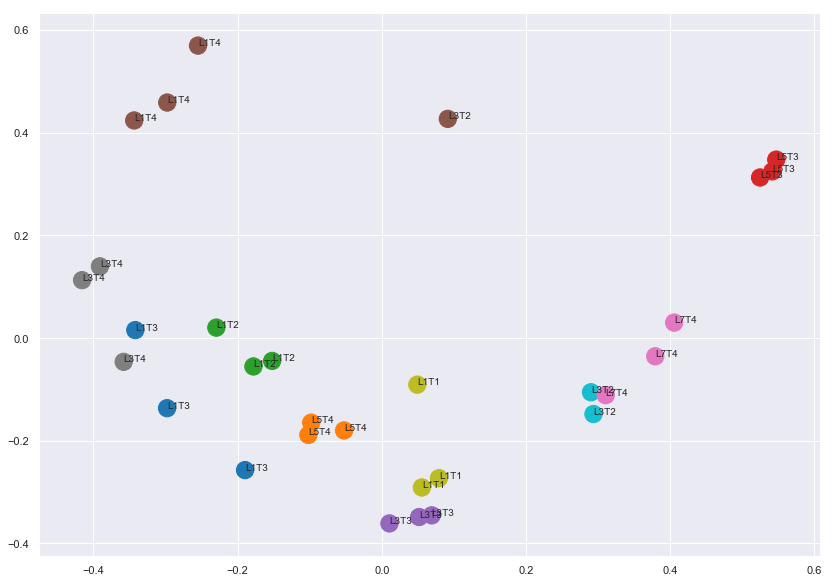

In [13]:
#from sklearn.cluster import SpectralClustering
SCluster = SpectralClustering(n_clusters = 10, n_init = 100, affinity = 'rbf', assign_labels = 'kmeans')
y_SC = SCluster.fit_predict(X_trans)

plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y_SC, s = 300, cmap='tab10')
#plt.title('Accuracy score {} for {} PCA components.'.format(acc_score, 5))
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_trans[:,0][i], X_trans[:,1][i]))
plt.show()